Ratio Prediction - Reported & Incremental Average

Original Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  1.319  1.099  1.035  1.001  0.991  0.992  0.993   1.020      NaN   
2011  1.368  1.110  1.033  1.004  0.995  0.987  0.998   1.047     1.01   
2012  1.477  1.113  1.035  0.996  0.993  1.003  1.003   0.993     1.01   
2013  1.345  1.145  1.028  0.996  0.995  0.998  0.990   1.006     1.02   
2014  1.507  1.149  1.034  1.009  1.002  0.996  0.990   0.994     0.99   

      120→132  132→144  144→156  156→Ult  
2010      NaN      NaN      NaN      NaN  
2011      NaN      NaN      NaN      NaN  
2012    0.981      NaN      NaN      NaN  
2013    1.025    1.019      NaN      NaN  
2014    0.994    0.992     0.99      NaN  

Detected Outliers:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010    NaN    NaN    NaN    NaN  0.991    NaN    NaN     NaN      NaN   
2011    NaN    NaN    NaN    NaN    NaN  0.987    NaN   1.047      NaN   
2013    NaN    NaN  1.028    NaN    

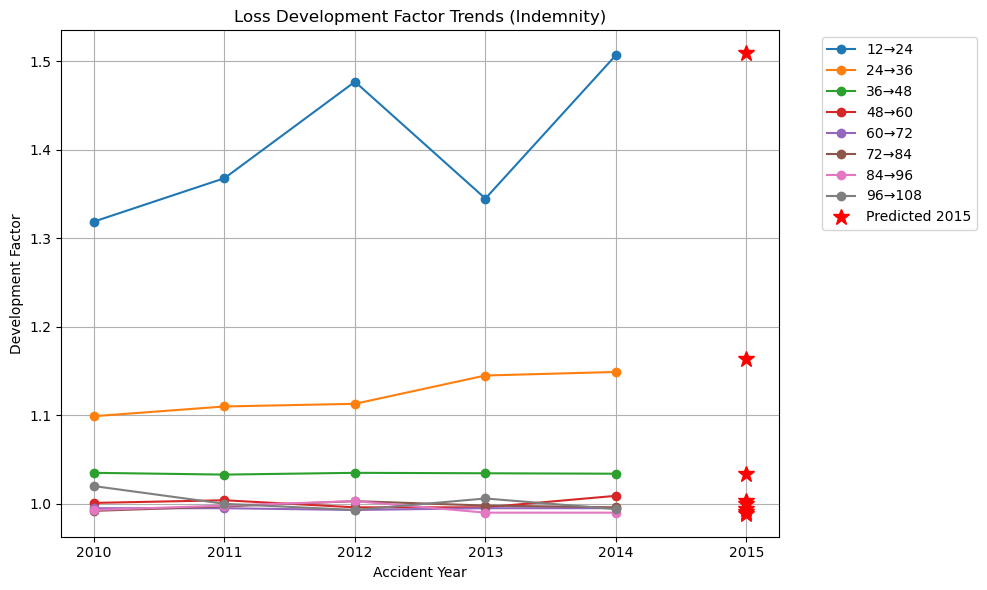

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Define the triangle data
# ------------------------------
data = {
    2010: [1.319, 1.099, 1.035, 1.001, 0.991, 0.992, 0.993, 1.020, np.nan, np.nan, np.nan, np.nan, np.nan],
    2011: [1.368, 1.110, 1.033, 1.004, 0.995, 0.987, 0.998, 1.047, 1.010, np.nan, np.nan, np.nan, np.nan],
    2012: [1.477, 1.113, 1.035, 0.996, 0.993, 1.003, 1.003, 0.993, 1.010, 0.981, np.nan, np.nan, np.nan],
    2013: [1.345, 1.145, 1.028, 0.996, 0.995, 0.998, 0.990, 1.006, 1.020, 1.025, 1.019, np.nan, np.nan],
    2014: [1.507, 1.149, 1.034, 1.009, 1.002, 0.996, 0.990, 0.994, 0.990, 0.994, 0.992, 0.990, np.nan]
}

cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df = pd.DataFrame(data).T
df.columns = cols

print("Original Triangle:")
print(df)
print()

# ------------------------------
# 2. Detect Outliers (IQR Method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7 * IQR, Q3 + 1 * IQR
    return (series < lower) | (series > upper)

outlier_mask = df.apply(find_outliers)
outliers = df[outlier_mask]

print("Detected Outliers:")
print(outliers.dropna(how="all"))
print()

# ------------------------------
# 3. Replace Outliers with NaN, then fill with Median
# ------------------------------
clean_df = df.mask(outlier_mask)
clean_df = clean_df.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Triangle (Outliers replaced with median):")
print(clean_df)
print()

# ------------------------------
# 4. Predict next (future) year's ratios using Linear Regression
# ------------------------------
years = np.array(clean_df.index).reshape(-1, 1)       # shape (n_samples, 1)
future_year = np.array([clean_df.index.max() + 1])    # 1D array, will reshape for prediction

predicted_ratios = []
for col in clean_df.columns:
    y = clean_df[col].values
    mask = ~np.isnan(y)
    
    # Only fit if at least 2 data points exist
    if mask.sum() < 2:
        predicted_ratios.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1, 1))[0]  # reshape to (1,1)
    predicted_ratios.append(pred)

predicted_row = pd.Series(predicted_ratios, index=clean_df.columns, name=future_year.item())
print("Predicted Development Factors for Next Year:")
print(predicted_row.round(3))
print()

# ------------------------------
# 5. Visualize the trends and prediction
# ------------------------------
plt.figure(figsize=(10, 6))

# Only plot columns with enough data
for col in clean_df.columns[:8]:  # adjust range if needed
    plt.plot(clean_df.index, clean_df[col], marker='o', label=col)

# Plot predictions for the next year
plt.plot([future_year[0]]*8, predicted_ratios[:8], 'r*', markersize=12, label=f'Predicted {future_year[0]}')


plt.title("Loss Development Factor Trends (Indemnity)")
plt.xlabel("Accident Year")
plt.ylabel("Development Factor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Ratio Prediction - Paid & Incremental Average

Original Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  2.657  1.508  1.212  1.115  1.060  1.030  1.015   1.025      NaN   
2011  2.735  1.550  1.236  1.137  1.066  1.032  1.022   1.037    1.023   
2012  3.266  1.546  1.230  1.118  1.057  1.040  1.025   1.003    1.014   
2013  2.885  1.554  1.236  1.117  1.061  1.030  1.017   1.024    1.026   
2014  2.869  1.534  1.236  1.115  1.060  1.027  1.015   1.012    1.011   

      120→132  132→144  144→156  156→Ult  
2010      NaN      NaN      NaN      NaN  
2011      NaN      NaN      NaN      NaN  
2012    1.000      NaN      NaN      NaN  
2013    1.035    1.021      NaN      NaN  
2014    1.012    1.019    1.007      NaN  

Detected Outliers in Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010    NaN  1.508  1.212    NaN    NaN    NaN    NaN     NaN      NaN   
2011    NaN    NaN    NaN  1.137  1.066    NaN    NaN     NaN      NaN   
2012  3.266   

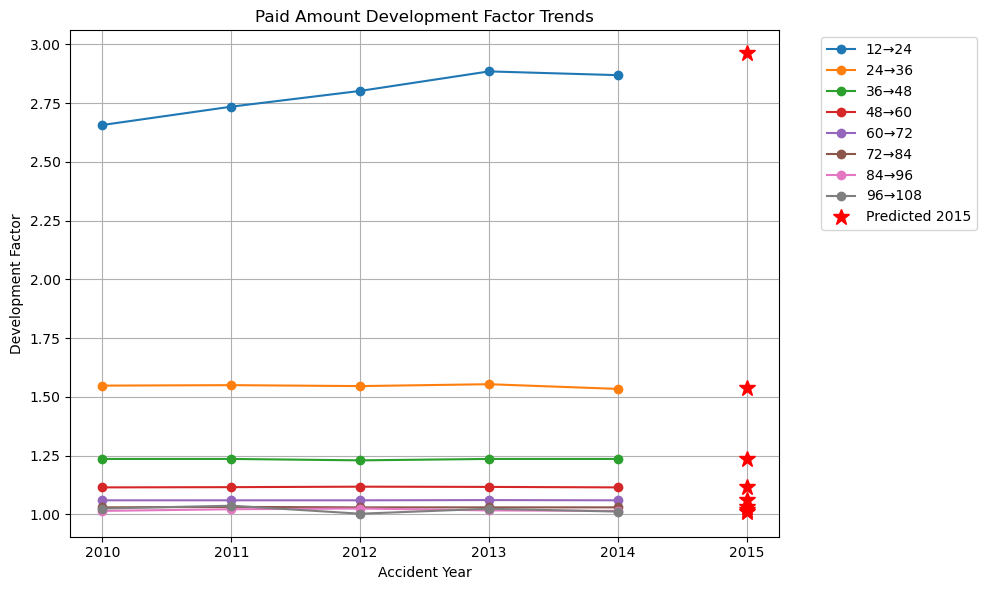

In [16]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Define the "paid amount" triangle
# ------------------------------
data_paid = {
    2010: [2.657, 1.508, 1.212, 1.115, 1.060, 1.030, 1.015, 1.025, np.nan, np.nan, np.nan, np.nan, np.nan],
    2011: [2.735, 1.550, 1.236, 1.137, 1.066, 1.032, 1.022, 1.037, 1.023, np.nan, np.nan, np.nan, np.nan],
    2012: [3.266, 1.546, 1.230, 1.118, 1.057, 1.040, 1.025, 1.003, 1.014, 1.000, np.nan, np.nan, np.nan],
    2013: [2.885, 1.554, 1.236, 1.117, 1.061, 1.030, 1.017, 1.024, 1.026, 1.035, 1.021, np.nan, np.nan],
    2014: [2.869, 1.534, 1.236, 1.115, 1.060, 1.027, 1.015, 1.012, 1.011, 1.012, 1.019, 1.007, np.nan]
}

cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df_paid = pd.DataFrame(data_paid).T
df_paid.columns = cols

print("Original Paid Triangle:")
print(df_paid)
print()

# ------------------------------
# 2. Detect Outliers (IQR Method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7 * IQR, Q3 + 1 * IQR
    return (series < lower) | (series > upper)

outlier_mask = df_paid.apply(find_outliers)
outliers = df_paid[outlier_mask]

print("Detected Outliers in Paid Triangle:")
print(outliers.dropna(how="all"))
print()

# ------------------------------
# 3. Replace Outliers with NaN, then fill with Median
# ------------------------------
clean_paid = df_paid.mask(outlier_mask)
clean_paid = clean_paid.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Paid Triangle (Outliers replaced with median):")
print(clean_paid)
print()

# ------------------------------
# 4. Predict next year's ratios using Linear Regression
# ------------------------------
years = np.array(clean_paid.index).reshape(-1, 1)
future_year = np.array([clean_paid.index.max() + 1])  # 1D array

predicted_paid = []
for col in clean_paid.columns:
    y = clean_paid[col].values
    mask = ~np.isnan(y)
    
    # Only fit if at least 2 data points exist
    if mask.sum() < 2:
        predicted_paid.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1, 1))[0]
    predicted_paid.append(pred)

predicted_row = pd.Series(predicted_paid, index=clean_paid.columns, name=future_year.item())
print("Predicted Paid Ratios for Next Year:")
print(predicted_row.round(3))
print()

# ------------------------------
# 5. Visualize the trends and predictions
# ------------------------------
plt.figure(figsize=(10, 6))

# Plot columns that have data
num_cols_to_plot = min(8, clean_paid.shape[1])  # adjust as needed
for col in clean_paid.columns[:num_cols_to_plot]:
    plt.plot(clean_paid.index, clean_paid[col], marker='o', label=col)

# Plot predicted points
plt.plot([future_year[0]]*num_cols_to_plot, predicted_paid[:num_cols_to_plot], 'r*',
         markersize=12, label=f'Predicted {future_year[0]}')

plt.title("Paid Amount Development Factor Trends")
plt.xlabel("Accident Year")
plt.ylabel("Development Factor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

Ratio Prediction - Reported & Cumulative

Original Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  2.657  1.508  1.212  1.115  1.060  1.030  1.015   1.025      NaN   
2011  2.735  1.550  1.236  1.137  1.066  1.032  1.022   1.037    1.023   
2012  3.266  1.546  1.230  1.118  1.057  1.040  1.025   1.003    1.014   
2013  2.885  1.554  1.236  1.117  1.061  1.030  1.017   1.024    1.026   
2014  2.869  1.534  1.236  1.115  1.060  1.027  1.015   1.012    1.011   

      120→132  132→144  144→156  156→Ult  
2010      NaN      NaN      NaN      NaN  
2011      NaN      NaN      NaN      NaN  
2012    1.000      NaN      NaN      NaN  
2013    1.035    1.021      NaN      NaN  
2014    1.012    1.019    1.007      NaN  

Detected Outliers in Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010    NaN  1.508  1.212    NaN    NaN    NaN    NaN     NaN      NaN   
2011    NaN    NaN    NaN  1.137  1.066    NaN    NaN   1.037      NaN   
2012  3.266   

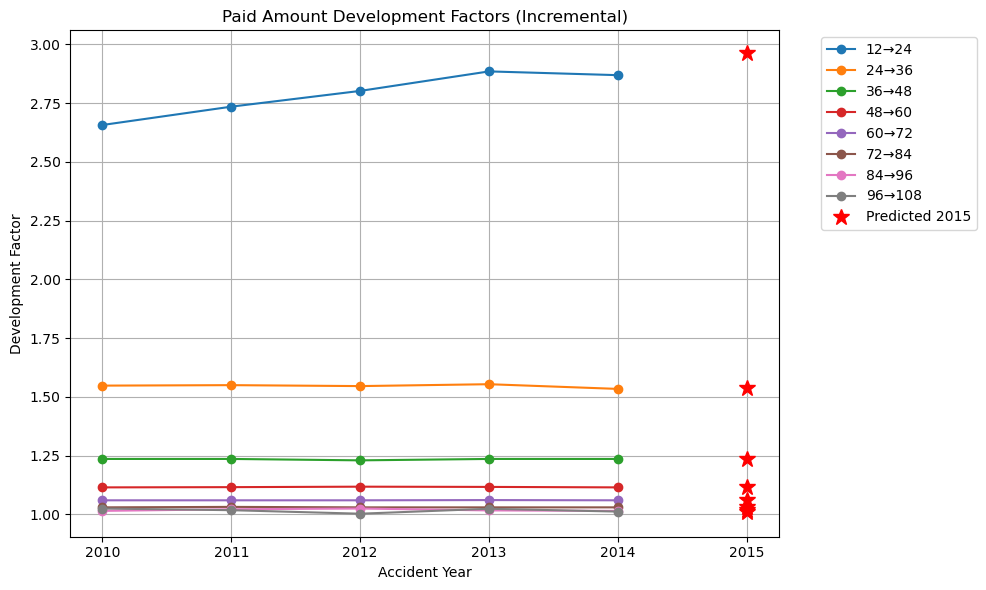

In [21]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Paid amount triangle data
# ------------------------------
data_paid = {
    2010: [2.657, 1.508, 1.212, 1.115, 1.060, 1.030, 1.015, 1.025, np.nan, np.nan, np.nan, np.nan, np.nan],
    2011: [2.735, 1.550, 1.236, 1.137, 1.066, 1.032, 1.022, 1.037, 1.023, np.nan, np.nan, np.nan, np.nan],
    2012: [3.266, 1.546, 1.230, 1.118, 1.057, 1.040, 1.025, 1.003, 1.014, 1.000, np.nan, np.nan, np.nan],
    2013: [2.885, 1.554, 1.236, 1.117, 1.061, 1.030, 1.017, 1.024, 1.026, 1.035, 1.021, np.nan, np.nan],
    2014: [2.869, 1.534, 1.236, 1.115, 1.060, 1.027, 1.015, 1.012, 1.011, 1.012, 1.019, 1.007, np.nan]
}

cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df_paid = pd.DataFrame(data_paid).T
df_paid.columns = cols

print("Original Paid Triangle:")
print(df_paid)
print()

# ------------------------------
# 2. Detect outliers (IQR method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7*IQR, Q3 + 0.7*IQR
    return (series < lower) | (series > upper)

outlier_mask = df_paid.apply(find_outliers)
outliers = df_paid[outlier_mask]

print("Detected Outliers in Paid Triangle:")
print(outliers.dropna(how='all'))
print()

# ------------------------------
# 3. Replace outliers with NaN, then fill with median
# ------------------------------
clean_paid = df_paid.mask(outlier_mask)
clean_paid = clean_paid.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Paid Triangle (Outliers replaced with median):")
print(clean_paid)
print()

# ------------------------------
# 4. Predict next year's incremental factors using linear regression
# ------------------------------
years = np.array(clean_paid.index).reshape(-1,1)
future_year = np.array([clean_paid.index.max() + 1])

predicted_inc = []
for col in clean_paid.columns:
    y = clean_paid[col].values
    mask = ~np.isnan(y)
    
    if mask.sum() < 2:
        predicted_inc.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1,1))[0]
    predicted_inc.append(pred)

predicted_inc_row = pd.Series(predicted_inc, index=clean_paid.columns, name=future_year.item())
print("Predicted Incremental Factors for Next Year:")
print(predicted_inc_row.round(3))
print()

# ------------------------------
# 5. Compute cumulative table for predicted year
# ------------------------------
cumulative = pd.Series(np.ones(len(cols)), index=cols)  # bottom row = 1 (ultimate)

# Compute cumulative backwards using .iloc to avoid warnings
for i in reversed(range(len(cols)-1)):
    cumulative.iloc[i] = cumulative.iloc[i+1] * predicted_inc_row.iloc[i]

print(f"Cumulative Factors for {future_year[0]}:")
print(cumulative.round(3))
print()

# ------------------------------
# 6. Visualize incremental trends and predictions
# ------------------------------
plt.figure(figsize=(10,6))

num_cols_to_plot = min(8, clean_paid.shape[1])  # adjust number of columns if needed
for col in clean_paid.columns[:num_cols_to_plot]:
    plt.plot(clean_paid.index, clean_paid[col], marker='o', label=col)

plt.plot([future_year[0]]*num_cols_to_plot, predicted_inc[:num_cols_to_plot], 'r*',
         markersize=12, label=f'Predicted {future_year[0]}')

plt.title("Paid Amount Development Factors (Incremental)")
plt.xlabel("Accident Year")
plt.ylabel("Development Factor")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Ratio Prediction - Paid & Cumulative

Original Paid Cumulative Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  7.361  2.558  1.657  1.340  1.201  1.133  1.101   1.084    1.071   
2011  7.705  2.563  1.659  1.344  1.204  1.136  1.101   1.080    1.062   
2012  7.567  2.575  1.665  1.349  1.203  1.133  1.098   1.077    1.063   
2013  7.392  2.564  1.667  1.355  1.210  1.140  1.105   1.085    1.063   
2014  7.392  2.564  1.667  1.355  1.210  1.140  1.105   1.085    1.063   

      120→132  132→144  144→156  156→Ult  
2010    1.052    1.028    1.007      1.0  
2011    1.044    1.028    1.007      1.0  
2012    1.044    1.028    1.007      1.0  
2013    1.044    1.028    1.007      1.0  
2014    1.044    1.028    1.007      1.0  

Detected Outliers in Paid Cumulative Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010    NaN  2.558    NaN    NaN    NaN    NaN    NaN     NaN    1.071   
2011  7.705    NaN    NaN    NaN    NaN    NaN    NaN     NaN    1

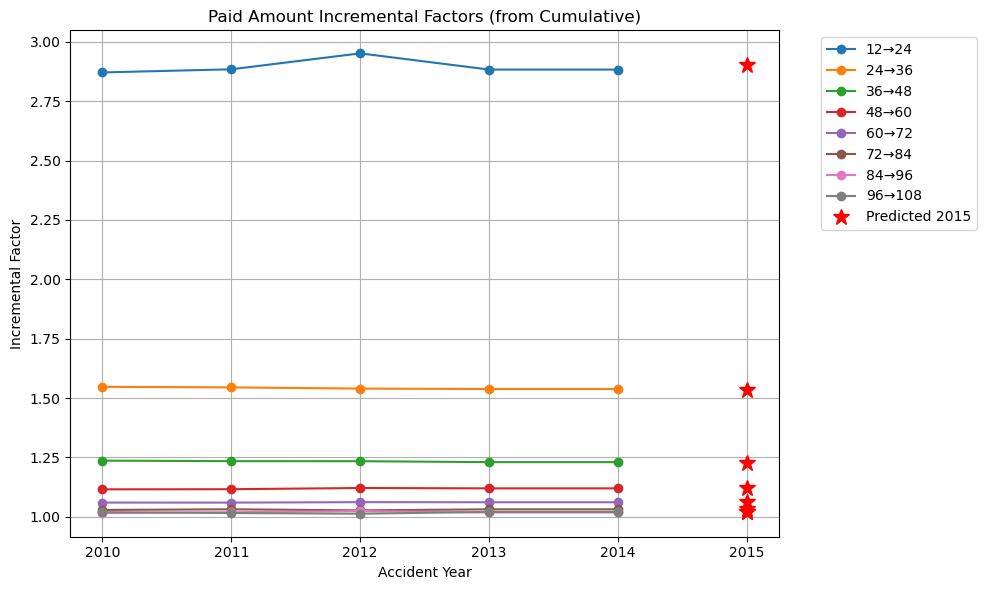

In [22]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Paid cumulative triangle data
# ------------------------------
data_paid_cum = {
    2010: [7.361, 2.558, 1.657, 1.340, 1.201, 1.133, 1.101, 1.084, 1.071, 1.052, 1.028, 1.007, 1.000],
    2011: [7.705, 2.563, 1.659, 1.344, 1.204, 1.136, 1.101, 1.080, 1.062, 1.044, 1.028, 1.007, 1.000],
    2012: [7.567, 2.575, 1.665, 1.349, 1.203, 1.133, 1.098, 1.077, 1.063, 1.044, 1.028, 1.007, 1.000],
    2013: [7.392, 2.564, 1.667, 1.355, 1.210, 1.140, 1.105, 1.085, 1.063, 1.044, 1.028, 1.007, 1.000],
    2014: [7.392, 2.564, 1.667, 1.355, 1.210, 1.140, 1.105, 1.085, 1.063, 1.044, 1.028, 1.007, 1.000]
}

cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df_paid_cum = pd.DataFrame(data_paid_cum).T
df_paid_cum.columns = cols

print("Original Paid Cumulative Triangle:")
print(df_paid_cum)
print()

# ------------------------------
# 2. Detect outliers (IQR method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7*IQR, Q3 + 0.7*IQR
    return (series < lower) | (series > upper)

outlier_mask = df_paid_cum.apply(find_outliers)
outliers = df_paid_cum[outlier_mask]

print("Detected Outliers in Paid Cumulative Triangle:")
print(outliers.dropna(how='all'))
print()

# ------------------------------
# 3. Replace outliers with NaN, then fill with median
# ------------------------------
clean_paid_cum = df_paid_cum.mask(outlier_mask)
clean_paid_cum = clean_paid_cum.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Paid Cumulative Triangle (Outliers replaced with median):")
print(clean_paid_cum)
print()

# ------------------------------
# 4. Compute incremental factors from cumulative
# ------------------------------
# Incremental factor = current column / next column (backward)
incremental_factors = clean_paid_cum.copy()
for i in range(len(cols)-1):
    incremental_factors.iloc[:, i] = clean_paid_cum.iloc[:, i] / clean_paid_cum.iloc[:, i+1]
incremental_factors.iloc[:, -1] = 1.0  # last column = 1 (ultimate)

print("Calculated Incremental Factors:")
print(incremental_factors)
print()

# ------------------------------
# 5. Predict next year's incremental factors using linear regression
# ------------------------------
years = np.array(incremental_factors.index).reshape(-1,1)
future_year = np.array([incremental_factors.index.max() + 1])

predicted_inc = []
for col in incremental_factors.columns:
    y = incremental_factors[col].values
    mask = ~np.isnan(y)
    
    if mask.sum() < 2:
        predicted_inc.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1,1))[0]
    predicted_inc.append(pred)

predicted_inc_row = pd.Series(predicted_inc, index=incremental_factors.columns, name=future_year.item())
print("Predicted Incremental Factors for Next Year:")
print(predicted_inc_row.round(3))
print()

# ------------------------------
# 6. Compute cumulative factors for predicted year
# ------------------------------
cumulative = pd.Series(np.ones(len(cols)), index=cols)  # last column = 1

# Compute cumulative backwards using .iloc
for i in reversed(range(len(cols)-1)):
    cumulative.iloc[i] = cumulative.iloc[i+1] * predicted_inc_row.iloc[i]

print(f"Cumulative Factors for {future_year[0]}:")
print(cumulative.round(3))
print()

# ------------------------------
# 7. Visualize incremental trends and predictions
# ------------------------------
plt.figure(figsize=(10,6))

num_cols_to_plot = min(8, incremental_factors.shape[1])  # plot first 8 columns
for col in incremental_factors.columns[:num_cols_to_plot]:
    plt.plot(incremental_factors.index, incremental_factors[col], marker='o', label=col)

plt.plot([future_year[0]]*num_cols_to_plot, predicted_inc[:num_cols_to_plot], 'r*',
         markersize=12, label=f'Predicted {future_year[0]}')

plt.title("Paid Amount Incremental Factors (from Cumulative)")
plt.xlabel("Accident Year")
plt.ylabel("Incremental Factor")
plt.legend(bbox_to_anchor=(1.05,1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Medical - Reported & Incremental Average

Original Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  1.239  1.001  0.994  0.986  0.994  0.989  1.004   1.057      NaN   
2011  1.263  1.019  1.003  0.984  0.989  0.985  0.994   1.030    1.038   
2012  1.362  1.005  0.990  0.984  0.990  0.983  1.011   1.042    0.998   
2013  1.232  1.057  0.974  0.975  0.992  0.987  0.997   1.030    1.057   
2014  1.334  1.026  0.978  0.996  0.989  0.986  0.997   1.017    1.007   

      120→132  132→144  144→156  156→Ult  
2010      NaN      NaN      NaN      NaN  
2011      NaN      NaN      NaN      NaN  
2012    0.989      NaN      NaN      NaN  
2013    1.022    1.020      NaN      NaN  
2014    1.005    0.991     0.99      NaN  

Detected Outliers:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010    NaN    NaN    NaN    NaN    NaN    NaN    NaN   1.057      NaN   
2012    NaN    NaN    NaN    NaN    NaN  0.983    NaN     NaN      NaN   
2013    NaN  1.057    NaN  0.975    

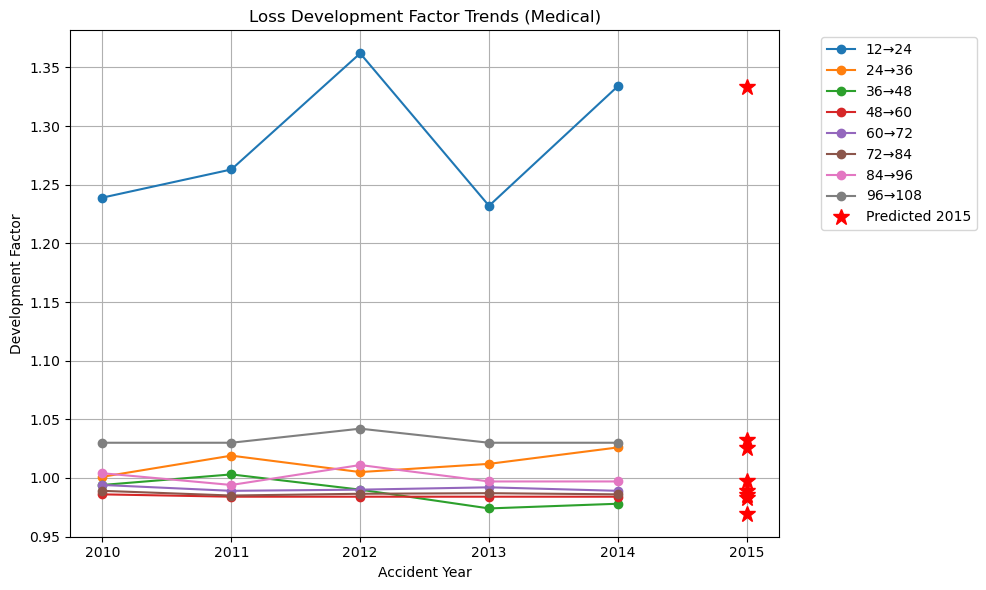

In [4]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Define the triangle data
# ------------------------------
data = {
    2010: [1.239, 1.001, 0.994, 0.986, 0.994, 0.989, 1.004, 1.057, np.nan, np.nan, np.nan, np.nan, np.nan],
    2011: [1.263, 1.019, 1.003, 0.984, 0.989, 0.985, 0.994, 1.030, 1.038, np.nan, np.nan, np.nan, np.nan],
    2012: [1.362, 1.005, 0.990, 0.984, 0.990, 0.983, 1.011, 1.042, 0.998, 0.989, np.nan, np.nan, np.nan],
    2013: [1.232, 1.057, 0.974, 0.975, 0.992, 0.987, 0.997, 1.030, 1.057, 1.022, 1.020, np.nan, np.nan],
    2014: [1.334, 1.026, 0.978, 0.996, 0.989, 0.986, 0.997, 1.017, 1.007, 1.005, 0.991, 0.990, np.nan]
}

cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df = pd.DataFrame(data).T
df.columns = cols

print("Original Triangle:")
print(df)
print()

# ------------------------------
# 2. Detect Outliers (IQR Method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7 * IQR, Q3 + 1 * IQR
    return (series < lower) | (series > upper)

outlier_mask = df.apply(find_outliers)
outliers = df[outlier_mask]

print("Detected Outliers:")
print(outliers.dropna(how="all"))
print()

# ------------------------------
# 3. Replace Outliers with NaN, then fill with Median
# ------------------------------
clean_df = df.mask(outlier_mask)
clean_df = clean_df.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Triangle (Outliers replaced with median):")
print(clean_df)
print()

# ------------------------------
# 4. Predict next (future) year's ratios using Linear Regression
# ------------------------------
years = np.array(clean_df.index).reshape(-1, 1)       # shape (n_samples, 1)
future_year = np.array([clean_df.index.max() + 1])    # 1D array, will reshape for prediction

predicted_ratios = []
for col in clean_df.columns:
    y = clean_df[col].values
    mask = ~np.isnan(y)
    
    # Only fit if at least 2 data points exist
    if mask.sum() < 2:
        predicted_ratios.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1, 1))[0]  # reshape to (1,1)
    predicted_ratios.append(pred)

predicted_row = pd.Series(predicted_ratios, index=clean_df.columns, name=future_year.item())
print("Predicted Development Factors for Next Year:")
print(predicted_row.round(3))
print()

# ------------------------------
# 5. Visualize the trends and prediction
# ------------------------------
plt.figure(figsize=(10, 6))

# Only plot columns with enough data
for col in clean_df.columns[:8]:  # adjust range if needed
    plt.plot(clean_df.index, clean_df[col], marker='o', label=col)

# Plot predictions for the next year
plt.plot([future_year[0]]*8, predicted_ratios[:8], 'r*', markersize=12, label=f'Predicted {future_year[0]}')


plt.title("Loss Development Factor Trends (Medical)")
plt.xlabel("Accident Year")
plt.ylabel("Development Factor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()


Medical - Paid & Incremental Average

Original Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  1.913  1.118  1.049  1.022  1.016  1.005  1.003   1.039      NaN   
2011  1.957  1.118  1.039  1.021  1.009  1.006  1.005   1.026    1.037   
2012  2.048  1.114  1.041  1.016  1.008  1.003  1.008   1.019    1.003   
2013  1.961  1.135  1.037  1.015  1.006  1.006  1.003   1.021    1.042   
2014  1.944  1.113  1.094  1.018  1.009  1.002  1.004   1.016    1.009   

      120→132  132→144  144→156  156→Ult  
2010      NaN      NaN      NaN      NaN  
2011      NaN      NaN      NaN      NaN  
2012    1.010      NaN      NaN      NaN  
2013    1.025    1.034      NaN      NaN  
2014    1.026    1.010    1.025      NaN  

Detected Outliers in Paid Triangle:
      12→24  24→36  36→48  48→60  60→72  72→84  84→96  96→108  108→120  \
2010  1.913    NaN    NaN    NaN  1.016    NaN    NaN   1.039      NaN   
2012  2.048    NaN    NaN    NaN    NaN    NaN  1.008     NaN      NaN   
2013    NaN  1

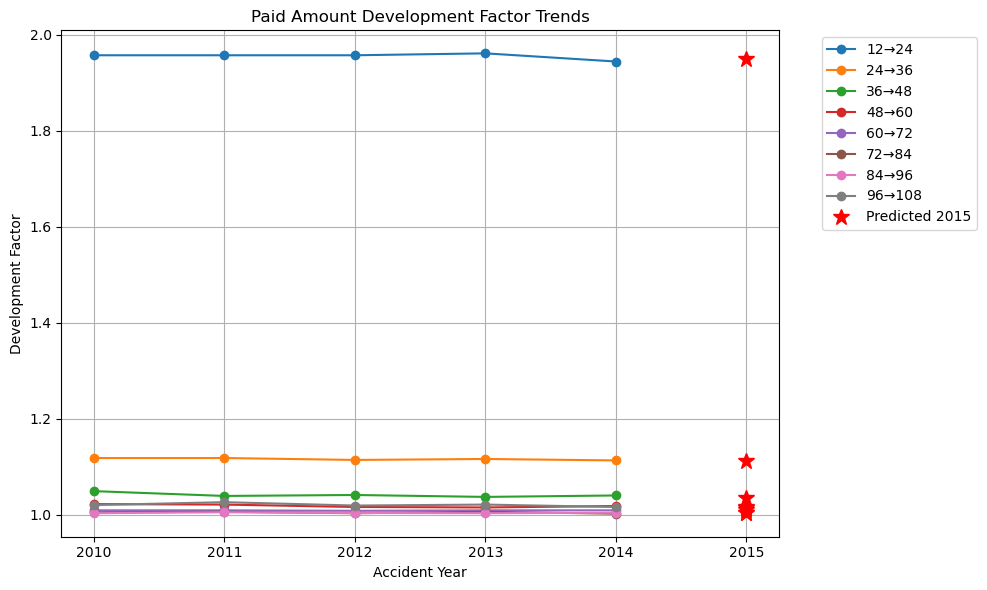

In [7]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# ------------------------------
# 1. Define the "paid amount" triangle
# ------------------------------
data_paid = {
    2010: [1.913, 1.118, 1.049, 1.022, 1.016, 1.005, 1.003, 1.039, np.nan, np.nan, np.nan, np.nan, np.nan],
    2011: [1.957, 1.118, 1.039, 1.021, 1.009, 1.006, 1.005, 1.026, 1.037, np.nan, np.nan, np.nan, np.nan],
    2012: [2.048, 1.114, 1.041, 1.016, 1.008, 1.003, 1.008, 1.019, 1.003, 1.010, np.nan, np.nan, np.nan],
    2013: [1.961, 1.135, 1.037, 1.015, 1.006, 1.006, 1.003, 1.021, 1.042, 1.025, 1.034, np.nan, np.nan],
    2014: [1.944, 1.113, 1.094, 1.018, 1.009, 1.002, 1.004, 1.016, 1.009, 1.026, 1.010, 1.025, np.nan]
}
cols = ["12→24", "24→36", "36→48", "48→60", "60→72", "72→84", "84→96",
        "96→108", "108→120", "120→132", "132→144", "144→156", "156→Ult"]

df_paid = pd.DataFrame(data_paid).T
df_paid.columns = cols

print("Original Paid Triangle:")
print(df_paid)
print()

# ------------------------------
# 2. Detect Outliers (IQR Method)
# ------------------------------
def find_outliers(series):
    Q1 = series.quantile(0.25)
    Q3 = series.quantile(0.75)
    IQR = Q3 - Q1
    lower, upper = Q1 - 0.7 * IQR, Q3 + 1 * IQR
    return (series < lower) | (series > upper)

outlier_mask = df_paid.apply(find_outliers)
outliers = df_paid[outlier_mask]

print("Detected Outliers in Paid Triangle:")
print(outliers.dropna(how="all"))
print()

# ------------------------------
# 3. Replace Outliers with NaN, then fill with Median
# ------------------------------
clean_paid = df_paid.mask(outlier_mask)
clean_paid = clean_paid.apply(lambda col: col.fillna(col.median()), axis=0)

print("Cleaned Paid Triangle (Outliers replaced with median):")
print(clean_paid)
print()

# ------------------------------
# 4. Predict next year's ratios using Linear Regression
# ------------------------------
years = np.array(clean_paid.index).reshape(-1, 1)
future_year = np.array([clean_paid.index.max() + 1])  # 1D array

predicted_paid = []
for col in clean_paid.columns:
    y = clean_paid[col].values
    mask = ~np.isnan(y)
    
    # Only fit if at least 2 data points exist
    if mask.sum() < 2:
        predicted_paid.append(np.nan)
        continue
    
    model = LinearRegression()
    model.fit(years[mask], y[mask])
    pred = model.predict(future_year.reshape(-1, 1))[0]
    predicted_paid.append(pred)

predicted_row = pd.Series(predicted_paid, index=clean_paid.columns, name=future_year.item())
print("Predicted Paid Ratios for Next Year:")
print(predicted_row.round(3))
print()

# ------------------------------
# 5. Visualize the trends and predictions
# ------------------------------
plt.figure(figsize=(10, 6))

# Plot columns that have data
num_cols_to_plot = min(8, clean_paid.shape[1])  # adjust as needed
for col in clean_paid.columns[:num_cols_to_plot]:
    plt.plot(clean_paid.index, clean_paid[col], marker='o', label=col)

# Plot predicted points
plt.plot([future_year[0]]*num_cols_to_plot, predicted_paid[:num_cols_to_plot], 'r*',
         markersize=12, label=f'Predicted {future_year[0]}')

plt.title("Paid Amount Development Factor Trends")
plt.xlabel("Accident Year")
plt.ylabel("Development Factor")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()